__Teammates__

* Jorge Armando Jimenez

* Salvador Pluma

* Emanuel de la Cruz

__Instructions__:

1. You will work on one of the datasets available on kaggle repository around COVID-19 (https://www.kaggle.com/). See the document  Descargar documentfor detailed specifications and chose a specific challenge.

2. Develop a Python notebook (file with termination “ipynb”), which will include the application of three classifiers, using the sklearn library, and eventually using a percentage T% of the samples.

3. Describe the learning process and the test results in a very well explained notebook that includes title, authors, summary, description of the work done (here will be the code), results (of the performance tests and their explanation), discussion and conclusions, with bibliographic references at the end.


__Importing Libraries__

In [1]:
# Basic Libs
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd
from scipy import stats
import seaborn as sns

# Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split,  cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, confusion_matrix

# Plotting libs
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"

# Avoid Warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

__Loading data__

In [2]:
data = pd.read_csv('./input/kaggle/country_vaccinations.csv')

In [3]:
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [4]:
data.shape

(86512, 15)

__Cleaning the data__

The values that arevalid such as N/A or NULL will be eliminated.

In [5]:
data.dropna(inplace=True)

__Filtering Only Mexico Data__

Since we are interested only in the data from Mexico, we will remove all the data from other countries.

In [6]:
data = data[data['iso_code'] == 'MEX']

In [7]:
data.reset_index(inplace=True)

In [8]:
data.head()

,index,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,49909,Mexico,MEX,2021-01-15,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
1,49910,Mexico,MEX,2021-01-16,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
2,49911,Mexico,MEX,2021-01-17,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
3,49912,Mexico,MEX,2021-01-18,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...
4,49913,Mexico,MEX,2021-01-19,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...


In [9]:
data.shape

(316, 16)

We are interested on how the number of vaccinations have progressed over the time, so we will reorder the data according the date time of it.

In [10]:
data['date'] = pd.to_datetime(data['date'])

In [11]:
data = data.sort_values(by='date')

In [12]:
start_date = data['date'][0]

In [13]:
print('The starting date registered is: {0}'.format(start_date.strftime('%d-%m-%Y')))

The starting date registered is: 15-01-2021


In [14]:
days_passed = data['date'] - start_date

In [15]:
data['days_passed'] = days_passed

In [16]:
data.head()

,index,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,days_passed
0,49909,Mexico,MEX,2021-01-15,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,0 days
1,49910,Mexico,MEX,2021-01-16,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,1 days
2,49911,Mexico,MEX,2021-01-17,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,2 days
3,49912,Mexico,MEX,2021-01-18,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,3 days
4,49913,Mexico,MEX,2021-01-19,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Secretary of Health,http://www.gob.mx/cms/uploads/attachment/file/...,4 days


In [17]:
data.shape

(316, 17)

We will reorder the data, and only take what is important to us:

In [18]:
ndata = data[['days_passed',
              'total_vaccinations',
              'people_vaccinated',
              'people_fully_vaccinated',
              'daily_vaccinations_raw',
              'daily_vaccinations',
              'total_vaccinations_per_hundred',
              'people_vaccinated_per_hundred',
              'people_fully_vaccinated_per_hundred',
              'daily_vaccinations_per_million']]

In [19]:
ndata.head()

,days_passed,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0 days,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0
1,1 days,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0
2,2 days,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0
3,3 days,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0
4,4 days,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0


In [20]:
ndata['days_passed'].dt.days

0        0
1        1
2        2
3        3
4        4
      ... 
311    432
312    435
313    436
314    437
315    438
Name: days_passed, Length: 316, dtype: int64

In [21]:
ndata.shape

(316, 10)

In [22]:
ndata['days_passed']=ndata['days_passed'].dt.days

Convert the days from timestamp to a Integer datatype.

In [23]:
ndata.head()

,days_passed,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0
1,1,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0
2,2,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0
3,3,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0
4,4,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0


In [24]:
ndata.shape

(316, 10)

In [25]:
ndata.dtypes

days_passed                              int64
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
dtype: object

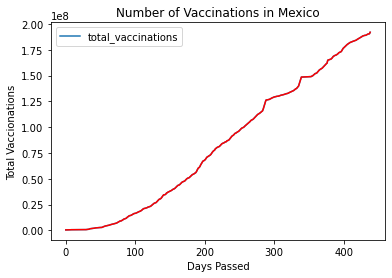

In [26]:
ndata.plot(x = 'days_passed', y = 'total_vaccinations')
plt.title('Number of Vaccinations in Mexico')
plt.xlabel('Days Passed')
plt.ylabel('Total Vaccionations')
plt.plot(ndata['days_passed'],ndata['total_vaccinations'], color='red')
plt.show()

__Total Vaccination__

In [27]:
lr_tv = LinearRegression(fit_intercept=True)
lr_tv.fit(ndata[['days_passed']],ndata['total_vaccinations'])

LinearRegression()

In [28]:
def print_linear_model_information(linear_model):
    m = linear_model.coef_
    b = linear_model.intercept_
    print('y = {}*x + {}'.format(m,b))

In [29]:
print_linear_model_information(lr_tv)

y = [486635.45266316]*x + -24680963.317750588


In [30]:
days_passed_s = ndata.days_passed
days_passed_s

0        0
1        1
2        2
3        3
4        4
      ... 
311    432
312    435
313    436
314    437
315    438
Name: days_passed, Length: 316, dtype: int64

In [31]:
days_passed_a = np.array(days_passed_s).reshape(-1,1)

In [32]:
# prediction = pd.DataFrame(lr_tv.predict(days_passed_a))
prediction = (lr_tv.predict(days_passed_a))

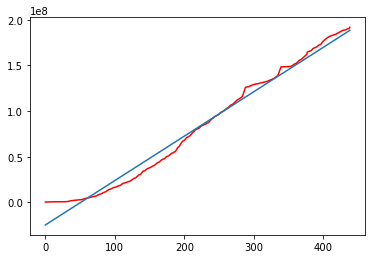

In [33]:
plt.plot(ndata['days_passed'],ndata['total_vaccinations'], color='red')
plt.plot(ndata['days_passed'],prediction)

Using the model we can predict when the number of vaccionations will end.

In [34]:
def find_x_value_for_given_y(linear_model,y):
    m = linear_model.coef_
    b = linear_model.intercept_
    # y = m * x + b -> x = (y - b) / m
    return (y-b) / m  

Using an estimated of Number of Mexicans in Mexico of 128.9 Millions

In [35]:
no_mexicans = 128.9*10**6

And taking of average of 2 vaccines per Mexican.

In [36]:
no_of_vaccines = 2*no_mexicans

In [37]:
no_of_vaccines

257800000.0

In [38]:
estimadted_days_passed = find_x_value_for_given_y(lr_tv,no_of_vaccines)
print('With this estimation we can say that the vaccines will end in: {}'.format(estimadted_days_passed))

With this estimation we can say that the vaccines will end in: [580.47756647]


In [39]:
end_date = start_date + pd.Timedelta(days=estimadted_days_passed[0])
print('Converting the value to a Date the estimation says that the Vaccines will be over in: \n{}'.format(end_date.strftime('%Y-%m-%d')))

Converting the value to a Date the estimation says that the Vaccines will be over in: 
2022-08-18


__People Vaccinated__

Now we will compared the number of People Vaccinated over the time.

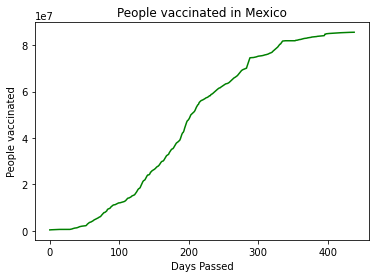

In [40]:
# ndata.plot(x = 'days_passed', y = 'total_vaccinations')
plt.title('People vaccinated in Mexico')
plt.xlabel('Days Passed')
plt.ylabel('People vaccinated')
plt.plot(ndata['days_passed'],ndata['people_vaccinated'], color='Green')
plt.show()

In [41]:
lr_pv = LinearRegression(fit_intercept=True)
lr_pv.fit(ndata[['days_passed']],ndata['people_vaccinated'])

LinearRegression()

In [42]:
print_linear_model_information(lr_pv)

y = [244669.99676557]*x + -6408694.466971628


In [43]:
prediction = (lr_pv.predict(days_passed_a))

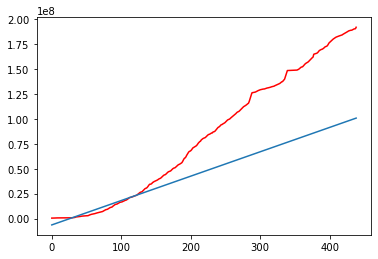

In [44]:
plt.plot(ndata['days_passed'],ndata['total_vaccinations'], color='red')
plt.plot(ndata['days_passed'],prediction)

In [45]:
estimadted_days_passed = find_x_value_for_given_y(lr_pv,no_of_vaccines)
print('With this estimation we can say that the vaccines will end in: {}'.format(estimadted_days_passed))

With this estimation we can say that the vaccines will end in: [1079.85735055]


In [46]:
end_date = start_date + pd.Timedelta(days=estimadted_days_passed[0])
print('Converting the value to a Date the estimation says that the Vaccines will be over in: \n{}'.format(end_date.strftime('%Y-%m-%d')))

Converting the value to a Date the estimation says that the Vaccines will be over in: 
2023-12-30


In [47]:
lr_pv = LinearRegression(fit_intercept=False)
lr_pv.fit(ndata[['days_passed']],ndata['people_vaccinated'])

LinearRegression(fit_intercept=False)

In [48]:
print_linear_model_information(lr_pv)

y = [221291.92932237]*x + 0.0


In [49]:
prediction = (lr_pv.predict(days_passed_a))

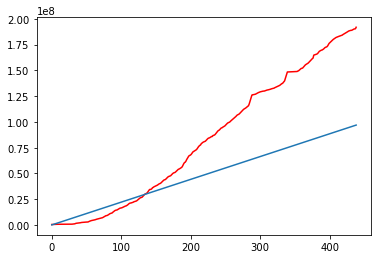

In [50]:
plt.plot(ndata['days_passed'],ndata['total_vaccinations'], color='red')
plt.plot(ndata['days_passed'],prediction)

In [51]:
estimadted_days_passed = find_x_value_for_given_y(lr_pv,no_of_vaccines)
print('With this estimation we can say that the vaccines will end in: {}'.format(estimadted_days_passed))

With this estimation we can say that the vaccines will end in: [1164.97696409]


In [52]:
end_date = start_date + pd.Timedelta(days=estimadted_days_passed[0])
print('Converting the value to a Date the estimation says that the Vaccines will be over in: \n{}'.format(end_date.strftime('%Y-%m-%d')))

Converting the value to a Date the estimation says that the Vaccines will be over in: 
2024-03-24


__Polynomial Fit for Total Vaccinations__

In [53]:
def estimate_numbers_of_days_needed(polynomial_model,initial_days=450,degree=2):
    poly=PolynomialFeatures(degree)
    days = initial_days
    for i in range(1500):
        res = polynomial_model.predict(poly.fit_transform([[days]]))
        days += 1
        if res[0][0] >= no_of_vaccines:
            loop_is_on = False
            break
    return days

In [54]:
x = ndata.iloc[:,0:1].values # days_passed
y = ndata.iloc[:,1:2].values # total_vaccinations

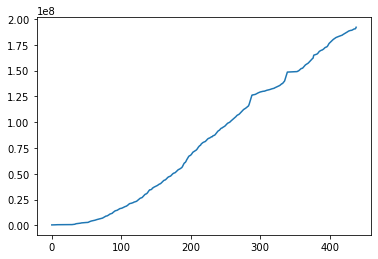

In [55]:
plt.plot(x,y)

In [56]:
poly=PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [57]:
pilreg=LinearRegression()
pilreg.fit(x_poly,y)

LinearRegression()

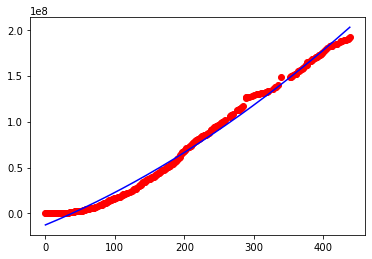

In [58]:
plt.scatter(x,y,color='red')
plt.plot(x,pilreg.predict(x_poly),color='blue')

In [59]:
print_linear_model_information(pilreg)

y = [[     0.         313217.89530425    406.29499192]]*x + [-12454022.0148778]


In [60]:
estimadted_days_passed = estimate_numbers_of_days_needed(pilreg,degree=2)
print('With this estimation we can say that the vaccines will end in: {}'.format(estimadted_days_passed))

With this estimation we can say that the vaccines will end in: 518


In [61]:
end_date = start_date + pd.Timedelta(days=estimadted_days_passed)
print('Converting the value to a Date the estimation says that the Vaccines will be over in: \n{}'.format(end_date.strftime('%Y-%m-%d')))

Converting the value to a Date the estimation says that the Vaccines will be over in: 
2022-06-17


___

In [62]:
poly=PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

In [63]:
pilreg=LinearRegression()
pilreg.fit(x_poly,y)

LinearRegression()

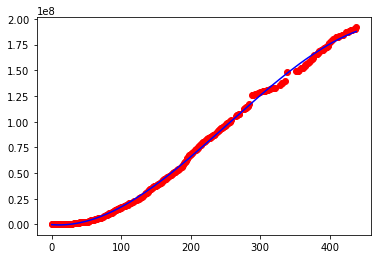

In [64]:
plt.scatter(x,y,color='red')
plt.plot(x,pilreg.predict(x_poly),color='blue')

In [65]:
print_linear_model_information(pilreg)

y = [[ 0.00000000e+00 -5.35334357e+04  2.60529472e+03 -3.43206281e+00]]*x + [-190219.28308056]


In [66]:
estimadted_days_passed = estimate_numbers_of_days_needed(pilreg,degree=3)
print('With this estimation we can say that the vaccines will end in: {}'.format(estimadted_days_passed))

With this estimation we can say that the vaccines will end in: 1950


In [67]:
end_date = start_date + pd.Timedelta(days=estimadted_days_passed)
print('Converting the value to a Date the estimation says that the Vaccines will be over in: \n{}'.format(end_date.strftime('%Y-%m-%d')))

Converting the value to a Date the estimation says that the Vaccines will be over in: 
2026-05-19


__Polynomial Fit for People Vaccinated__

In [68]:
ndata.head()

,days_passed,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0,417375.0,415417.0,1958.0,87392.0,49987.0,0.32,0.32,0.00,384.0
1,1,463246.0,461025.0,2221.0,45871.0,55493.0,0.36,0.35,0.00,426.0
2,2,472142.0,468708.0,3434.0,8896.0,55835.0,0.36,0.36,0.00,429.0
3,3,492529.0,485983.0,6546.0,20387.0,57924.0,0.38,0.37,0.01,445.0
4,4,498122.0,488513.0,9609.0,5593.0,57892.0,0.38,0.38,0.01,444.0


In [69]:
x = ndata.iloc[:,0:1].values # days_passed
y = ndata.iloc[:,2:3].values # people vaccinated

In [70]:
poly=PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [71]:
pilreg=LinearRegression()
pilreg.fit(x_poly,y)

LinearRegression()

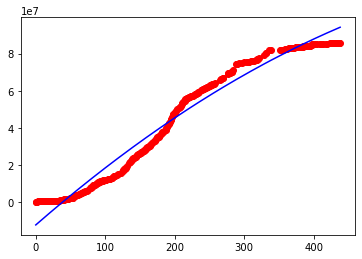

In [72]:
plt.scatter(x,y,color='red')
plt.plot(x,pilreg.predict(x_poly),color='blue')

In [73]:
print_linear_model_information(pilreg)

y = [[ 0.00000000e+00  3.25576222e+05 -1.89552861e+02]]*x + [-12113051.53212278]


In [74]:
estimadted_days_passed = estimate_numbers_of_days_needed(pilreg,degree=2)
print('With this estimation we can say that the vaccines will end in: {}'.format(estimadted_days_passed))

With this estimation we can say that the vaccines will end in: 1950


In [75]:
end_date = start_date + pd.Timedelta(days=estimadted_days_passed)
print('Converting the value to a Date the estimation says that the Vaccines will be over in: \n{}'.format(end_date.strftime('%Y-%m-%d')))

Converting the value to a Date the estimation says that the Vaccines will be over in: 
2026-05-19


___

In [76]:
poly=PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)

In [77]:
pilreg=LinearRegression()
pilreg.fit(x_poly,y)

LinearRegression()

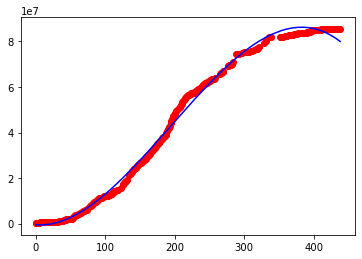

In [78]:
plt.scatter(x,y,color='red')
plt.plot(x,pilreg.predict(x_poly),color='blue')

In [79]:
print_linear_model_information(pilreg)

y = [[ 0.00000000e+00 -2.20694088e+04  1.89489123e+03 -3.25327147e+00]]*x + [-488124.56334455]


In [80]:
estimadted_days_passed = estimate_numbers_of_days_needed(pilreg,degree=3)
print('With this estimation we can say that the vaccines will end in: {}'.format(estimadted_days_passed))

With this estimation we can say that the vaccines will end in: 1950


In [81]:
end_date = start_date + pd.Timedelta(days=estimadted_days_passed)
print('Converting the value to a Date the estimation says that the Vaccines will be over in: \n{}'.format(end_date.strftime('%Y-%m-%d')))

Converting the value to a Date the estimation says that the Vaccines will be over in: 
2026-05-19
